In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import tensorflow as tf
from fkan.tensorflow import FractionalJacobiNeuralBlock as fJNB
from tensorflow.keras.layers import Activation

tf.keras.backend.set_floatx("float64")

plt.style.use("science")

In [2]:
%%timeit -n 10
t = tf.random.normal((1000, 1000))
F = Activation("relu")
F(t)

13.6 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [3]:
%%timeit -n 10
t = tf.random.normal((1000, 1000))
F = Activation("sigmoid")
F(t)

19.1 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
%%timeit -n 10
t = tf.random.normal((1000, 1000))
F = Activation("tanh")
F(t)

18.5 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
%%timeit -n 10

t = tf.random.normal((1000, 1000))
F = fJNB(1)
F(t)

56.2 ms ± 22.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%%timeit -n 10
t = tf.random.normal((1000, 1000))
F = fJNB(2)
F(t)

74.8 ms ± 3.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
%%timeit -n 10
t = tf.random.normal((1000, 1000))
F = fJNB(3)
F(t)

101 ms ± 2.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
%%timeit -n 10
t = tf.random.normal((1000, 1000))
F = fJNB(4)
F(t)

131 ms ± 6.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
%%timeit -n 10
t = tf.random.normal((1000, 1000))
F = fJNB(5)
F(t)

159 ms ± 5.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%%timeit -n 10
t = tf.random.normal((1000, 1000))
F = fJNB(6)
F(t)

201 ms ± 7.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


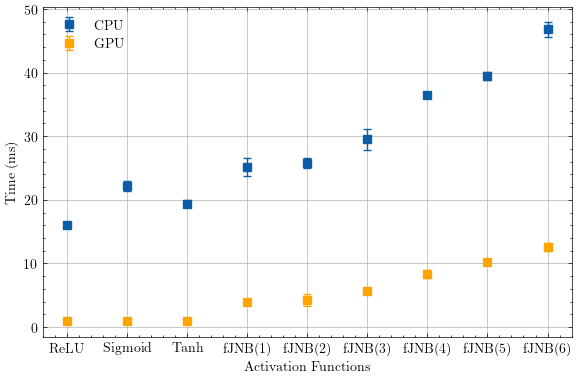

In [11]:
import matplotlib.pyplot as plt

activation_functions = [
    "ReLU",
    "Sigmoid",
    "Tanh",
    "fJNB(1)",
    "fJNB(2)",
    "fJNB(3)",
    "fJNB(4)",
    "fJNB(5)",
    "fJNB(6)",
]

cpu_mean_times = [16, 22.2, 19.4, 25.2, 25.8, 29.5, 36.5, 39.5, 46.8]
cpu_std_devs = [0.431, 0.797, 0.518, 1.38, 0.8, 1.66, 0.482, 0.662, 1.19]

gpu1_mean_times = [25.5, 26.1, 26.3, 27.8, 27.5, 27.8, 28.1, 28.4, 28.7]
gpu1_std_devs = [0.326, 0.564, 0.802, 0.953, 0.569, 0.636, 0.968, 0.898, 1.24]

gpu2_mean_times = [0.994, 1.02, 1.01, 3.94, 4.22, 5.71, 8.34, 10.3, 12.6]
gpu2_std_devs = [0.268, 0.139, 0.184, 0.397, 0.937, 0.161, 0.651, 0.202, 0.595]


plt.figure(figsize=(6, 4))
plt.errorbar(
    activation_functions,
    cpu_mean_times,
    yerr=cpu_std_devs,
    fmt="s",
    capsize=3,
    label="CPU",
)
plt.errorbar(
    activation_functions,
    gpu2_mean_times,
    yerr=gpu2_std_devs,
    fmt="s",
    capsize=3,
    label="GPU",
    color="orange",
)
plt.xlabel("Activation Functions")
plt.ylabel("Time (ms)")

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("compare-time.pdf", bbox_inches="tight")
plt.show()